In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
# Load CSV file
filepath = Path.cwd().parent/"dataSet" / "player_stats.csv"
data = pd.read_csv(filepath, encoding='UTF-8')
df = pd.DataFrame(data)

In [8]:
# Remove dots and dollar signs, and convert to float
df['value'] = df['value'].replace('[^\d]', '', regex=True).astype(float)

In [9]:
# Remove null column and player column as the name should not affect the market value  
df.drop('marking', axis=1, inplace=True)
df.drop('player', axis=1, inplace=True)

In [10]:
print(df.shape)

(5682, 39)


In [11]:
# Encode categorical columns to integers if present
categorical_columns = ['country', 'club']  # Removed 'player' as it was dropped earlier
for col in categorical_columns:
    if df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(df[col])

In [12]:
# Separate features and target
X = df.drop('value', axis=1)  
y = df['value']

In [13]:
# Split the dataset into training and test sets (70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 0.7, random_state=42)

# Further split the test set into training and validation sets (70% testing, 30% validation)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,train_size = 0.7, random_state=42)

In [19]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 11616673594156.549
R-squared Score: 0.8391250022659045


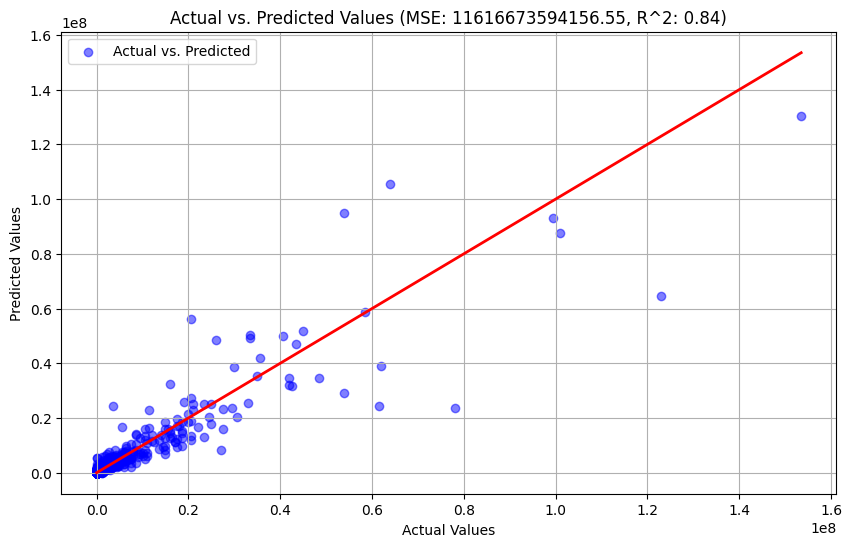

In [23]:
# Create scatter plot for actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5, c='blue', label='Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs. Predicted Values (MSE: {mse:.2f}, R^2: {r2:.2f})')

# create diagonal line that shows perfect prediction
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r-', lw=2)
plt.legend()
plt.grid(True)
plt.show()



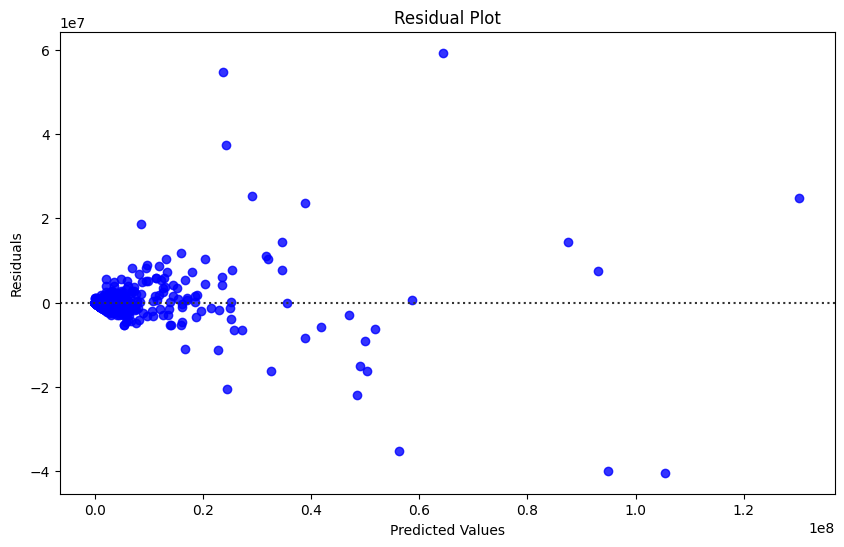

In [22]:
## Residual Plot
plt.figure(figsize=(10, 6))
sns.residplot(x=predictions, y=y_test - predictions, color="b")
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

Training Sizes: [ 454 1363 2272 3181 4090 4545] 
 Training Scores: [[-8.98766614e+11 -1.16000867e+12 -1.16000867e+12 -1.16000867e+12
  -1.16000867e+12]
 [-1.45366206e+12 -1.88237743e+12 -1.69486490e+12 -1.69486490e+12
  -1.69486490e+12]
 [-1.40308733e+12 -1.28932366e+12 -1.13353261e+12 -1.13353261e+12
  -1.13353261e+12]
 [-9.62887113e+11 -1.10031441e+12 -9.83356835e+11 -1.19175506e+12
  -1.19175506e+12]
 [-9.96235039e+11 -1.01311514e+12 -9.12094365e+11 -9.83997801e+11
  -8.68899091e+11]
 [-1.06220707e+12 -1.04798701e+12 -9.44733466e+11 -1.23586392e+12
  -8.72715064e+11]] 
 test_scores : [[-1.18558931e+13 -1.25376310e+13 -1.20124708e+13 -1.72739436e+13
  -5.02540182e+13]
 [-9.39123690e+12 -9.18496927e+12 -8.81346443e+12 -1.10612523e+13
  -3.19953331e+13]
 [-7.65096880e+12 -7.61614855e+12 -8.28351189e+12 -8.71613658e+12
  -1.96880713e+13]
 [-6.47385732e+12 -6.25574186e+12 -6.06890581e+12 -6.94642958e+12
  -1.95431120e+13]
 [-5.49788489e+12 -6.41302784e+12 -5.47561026e+12 -6.79621380e+12


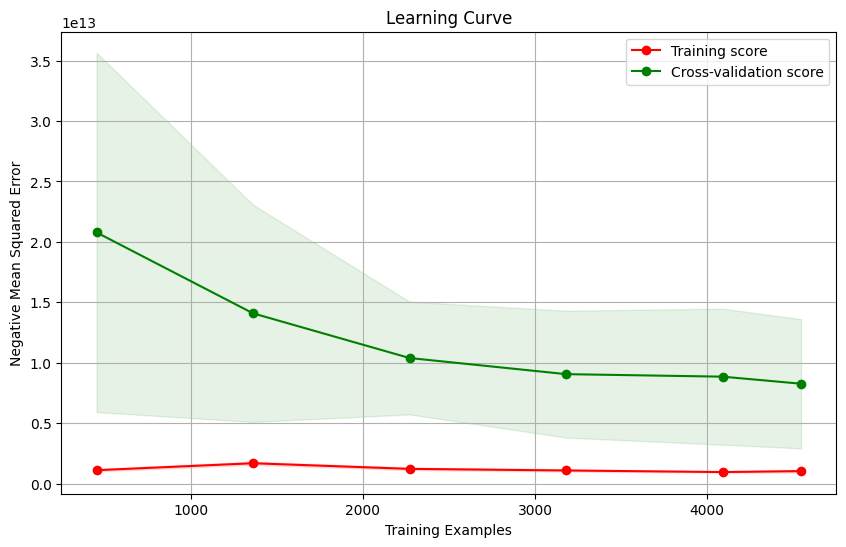

In [24]:
#visualise this models learning curve
train_sizes, train_scores, test_scores = learning_curve(
    RandomForestRegressor(random_state=42), X, y, train_sizes=[0.1, 0.3, 0.5, 0.7, 0.9, 1], 
    cv=5, scoring='neg_mean_squared_error', random_state=42
)

print(f"Training Sizes: {train_sizes} \n Training Scores: {train_scores} \n test_scores : {test_scores}")

# Calculate mean and standard deviation for training set scores and validation set scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotting
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Negative Mean Squared Error")
plt.legend(loc="best")
plt.grid(True)
plt.show()

Parameters: max_depth = None, min_samples_split = 2, min_samples_leaf = 1
Mean Squared Error: 13483868832383.676

R-squared score: 0.8132669089585396

Parameters: max_depth = None, min_samples_split = 2, min_samples_leaf = 2
Mean Squared Error: 14361997149735.293

R-squared score: 0.8011060360615643

Parameters: max_depth = None, min_samples_split = 2, min_samples_leaf = 4
Mean Squared Error: 16343346263607.973

R-squared score: 0.7736670681314455

Parameters: max_depth = None, min_samples_split = 5, min_samples_leaf = 1
Mean Squared Error: 13127924180139.443

R-squared score: 0.8181962542361807

Parameters: max_depth = None, min_samples_split = 5, min_samples_leaf = 2
Mean Squared Error: 14341203824055.334

R-squared score: 0.8013939951054795

Parameters: max_depth = None, min_samples_split = 5, min_samples_leaf = 4
Mean Squared Error: 16343346263607.973

R-squared score: 0.7736670681314455

Parameters: max_depth = None, min_samples_split = 10, min_samples_leaf = 1
Mean Squared Error:

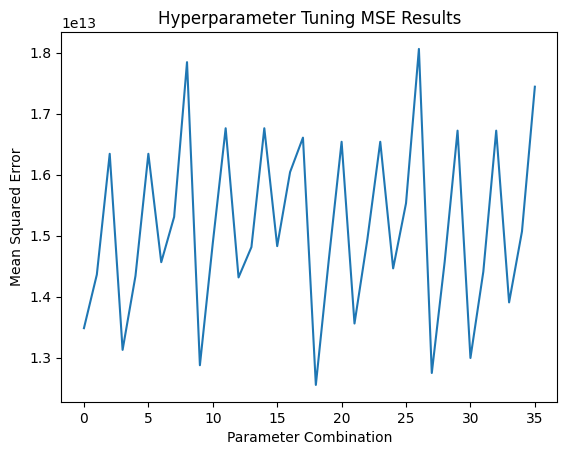

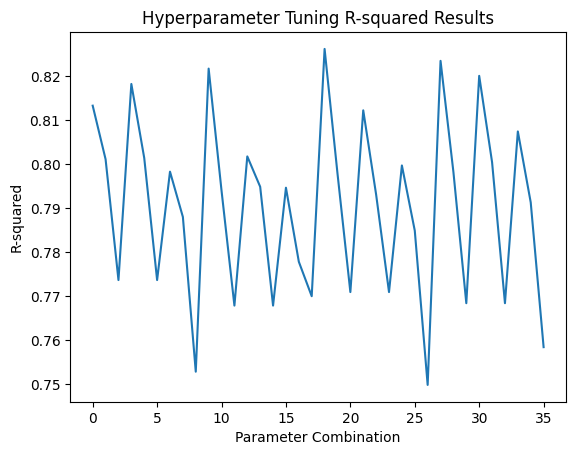

In [25]:
#Basic hyperparameter tuning
max_depths = [None, 10, 20, 30]
min_samples_splits = [2, 5, 10]
min_samples_leafs = [1, 2, 4]

# Lists to store performance metrics
MSE = []
R2 = []

# Hyperparameter tuning loop
for depth in max_depths:
    for min_samples_split in min_samples_splits:
        for min_samples_leaf in min_samples_leafs:
            
            # Initialize and train DecisionTreeRegressor
            model = RandomForestRegressor(max_depth=depth, 
                                             min_samples_split=min_samples_split,
                                             min_samples_leaf=min_samples_leaf,
                                             random_state=42, max_features='sqrt')
            
            model.fit(X_train, y_train)
            
            # Make predictions and compute Mean Squared Error and R-squared score
            y_pred = model.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            
            # Append MSE and R2 to the list
            MSE.append(mse)
            R2.append(r2)
            
            # Print the results
            print(f"Parameters: max_depth = {depth}, min_samples_split = {min_samples_split}, min_samples_leaf = {min_samples_leaf}")
            print(f"Mean Squared Error: {mse}\n")
            print(f"R-squared score: {r2}\n")

# Plotting results
# Visualize the MSE values corresponding to different hyperparameters
plt.plot(range(len(MSE)), MSE)
plt.xlabel('Parameter Combination')
plt.ylabel('Mean Squared Error')
plt.title('Hyperparameter Tuning MSE Results')
plt.show()

# Visualize the R-Squared score values corresponding to different hyperparameters
plt.plot(range(len(R2)), R2)
plt.xlabel('Parameter Combination')
plt.ylabel('R-squared')
plt.title('Hyperparameter Tuning R-squared Results')
plt.show()